In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import layers

from keras.datasets import mnist

In [3]:
#데이터 불러오기
# _ >> y_train, y_test 사용 안함
#이미지 데이터 구성 (이미지, 라벨)
#이미지만 사용하겠다

(x_train, _ ),(x_test, _ ) =  mnist.load_data()



11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# 0 과 1 사이(0-1)로 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
print(len(x_train))
print(len(x_test))


60000
10000


In [7]:
x_train.shape
#28 * 28 크기의 이미지 60000장

(60000, 28, 28)

In [8]:
x_train.shape[1:]
# 이미지 크기 (2차원)

(28, 28)

In [10]:
np.prod(x_train.shape[1:]) # (28 * 28) / prod() >> 주어진 배열이나 튜플의 모든 요소 곱하기 (1차원)

784

In [12]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))


In [13]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

autoencoder 모델링

In [15]:
#encoding 되는 차원수
encoding_dim = 32

#input player
input_img = keras.Input(shape=(784,)) # 1차원
# 784 >> 1차원으로 들어감

# hidden layer(784차원 >> 32차원)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
#Dense() : 1차원

#output layer (32차원 >> 784차원)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# 784차원으로 나오면 다중 분류니깐 softmx써야하는거 아니야? >> 일반적으로 다중분류는 softmax, 오토인코더는 복원하는 인공지능 기법(출력값은 0 또는 1사이로 제한)

#autoencoder model
autoencoder = keras.Model(input_img, decoded)

In [16]:
autoencoder.summary()

#파라미터 수 = (입력 유닛 수 * 출력 유닛 수) + 출력 유닛 수 (바이어스)

# dense
# 입력 유닛 수: 784
# 출력 유닛 수: 32
# 파라미터 수 = (784 * 32) + 32 = 25120

# dense_1
# 입력 유닛 수: 32
# 출력 유닛 수: 784
# 파라미터 수 = (32 * 784) + 784 = 25872

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


autoencoder 학습

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#적합 (train, fitting)

autoencoder.fit(x_train, x_train,
                epochs = 20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 6ms/step - loss: 0.2759 - val_loss: 0.1913
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1714 - val_loss: 0.1548
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1453 - val_loss: 0.1346
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1290 - val_loss: 0.1216
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1182 - val_loss: 0.1125
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1107 - val_loss: 0.1064
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - val_loss: 0.1021
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1019 - val_loss: 0.0995
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0975 - val_loss: 0.0955

학습결과 확인

In [18]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


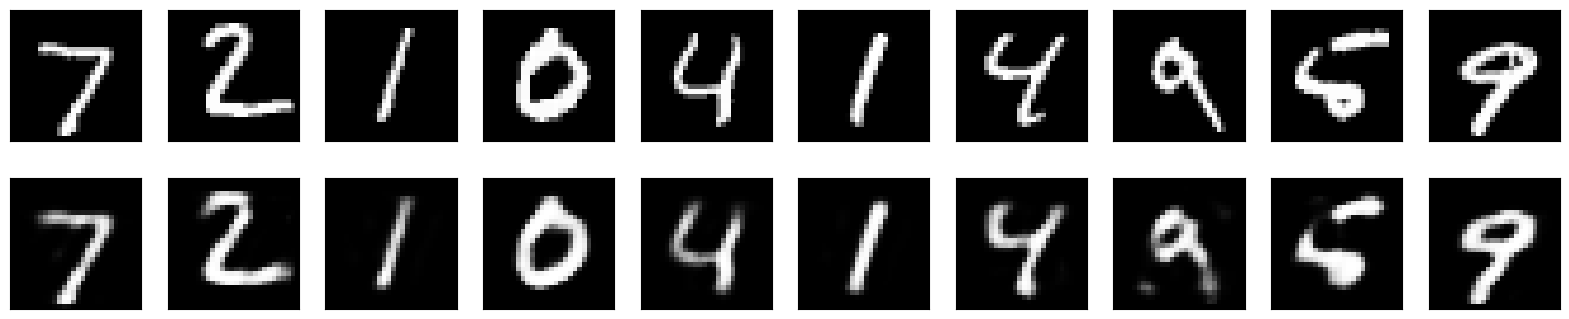

In [24]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # display (original image)
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28)) # 2차원 이미지로 복원
    plt.gray()
    ax.get_xaxis().set_visible(False) # x, y 축을 보여주지 마라
    ax.get_yaxis().set_visible(False)

    #display (복원된 이미지)
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28)) # 2차원 이미지로 복원
    plt.gray()
    ax.get_xaxis().set_visible(False) # x, y 축을 보여주지 마라
    ax.get_yaxis().set_visible(False)

plt.show()
